# primero procesar la data que es lo mas improtante
Aqui obtengo la data desde la data ya preprocesada para los tres approach

In [1]:
using Flux
using JLD2, FileIO
using Statistics
using Random
using Printf
using CategoricalArrays
include("unit2-multilayer-perceptron.jl")  
include("unit4-metrics.jl")                
include("ann_utils_original.jl") 
dataset_minmax = load_and_preprocess("data_checkpoints/approach_1_minmax.jld2")

dataset_pca = load_and_preprocess("data_checkpoints/approach_2_pca.jld2")

dataset_ica = load_and_preprocess("data_checkpoints/approach_3_ica.jld2")


 Loading file: data_checkpoints/approach_1_minmax.jld2 ...
 Loading file: data_checkpoints/approach_2_pca.jld2 ...
 Loading file: data_checkpoints/approach_3_ica.jld2 ...


(x_train = Float32[-2.045557 0.9454717 … 1.7110764 0.3035757; 0.46043295 1.0290605 … 0.41895372 0.11014669; … ; 0.0 0.0 … 1.0 0.0; 0.0 0.0 … 0.0 0.0], y_train_flux = Float32[0.0 0.0 … 0.0 1.0; 1.0 0.0 … 0.0 0.0; … ; 0.0 1.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], x_val = Float32[0.050395604 -0.44716448 … -0.60869193 0.2809065; -1.2566696 1.5497384 … 0.2678467 -0.6027377; … ; 0.0 0.0 … 1.0 0.0; 0.0 0.0 … 0.0 0.0], y_val_encoded = Bool[0 1 … 0 0; 1 0 … 0 0; … ; 0 0 … 1 0; 0 1 … 0 0], x_test = Float32[0.25601903 -0.24094342 … -1.5712907 -1.8645339; 0.65948653 1.9266798 … 0.08587466 1.0363604; … ; 0.0 1.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], y_test_encoded = Bool[1 0 … 0 0; 0 1 … 0 0; … ; 0 0 … 0 0; 0 1 … 0 0])

# trabajamos el primer appproach que es minmax



  Starting Topology Search for: Minmax

     WINNER SELECTED (Based on Validation): [16]
      Validation Sensitivity: 0.621
   Running Final Audit on TEST SET...
  FINAL TEST RESULTS:
  Sens: 0.7581 | Acc: 75.81% | F1: 0.756

  Generating Clinical Plots for Minmax...


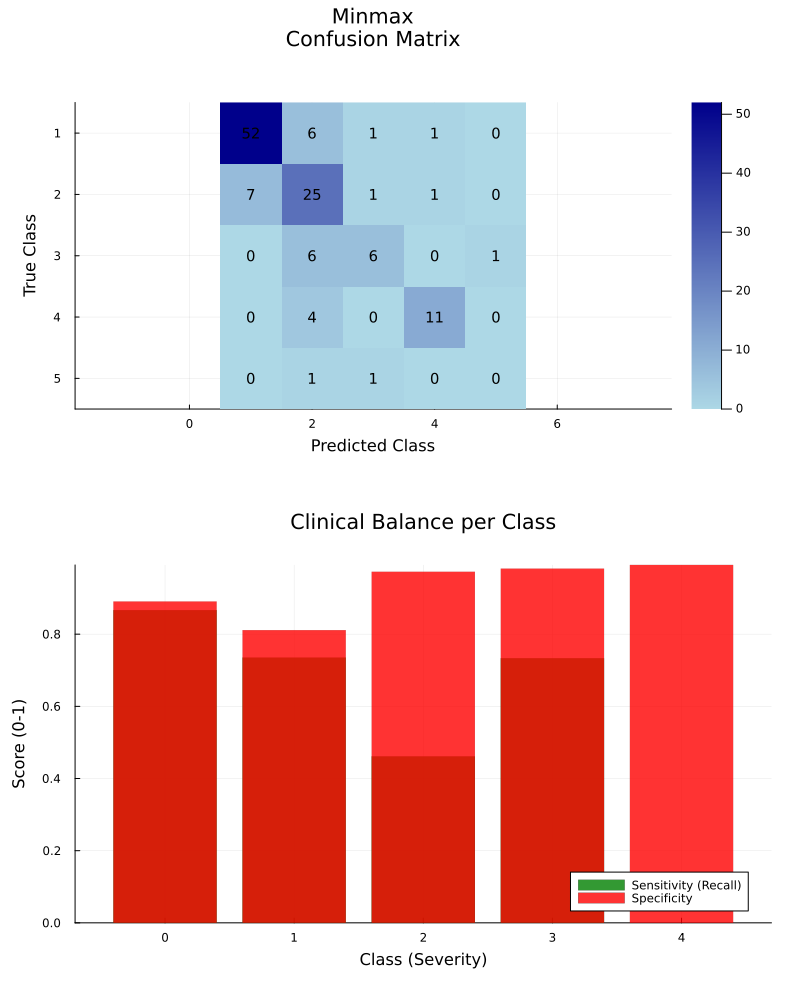

  Standardizing results for Ensemble (ANN_Minmax_Topo[16])...
   EXPORT SUCCESS: Resultados_ANN_Minmax.jld2
    Métricas Binarias -> Acc: 0.879 | F1: 0.884
Dict{String, Any}("nombre_modelo" => "ANN_Minmax_Topo[16]", "metricas" => Dict("f1_score" => 0.883720930232558, "specificity" => 0.8666666666666667, "auc_roc" => 0.0, "accuracy" => 0.8790322580645161, "recall" => 0.890625, "precision" => 0.8769230769230769, "training_time_sec" => 0.24000000953674316), "y_pred" => [0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], "y_test" => [0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1

In [5]:
# Define Topologies to Test (esta son las arquitecturas que utilizaremos)
topologies_to_test = [
    [8], [16], [32], [64],         
    [16, 8], [32, 16], [64, 32], 
    [8,16],[16,32],[32,64],
    [16, 16], [32, 32], [64,64]     
]

approach_name="Minmax"

# Aqui se entrena y se obtiene el mejor modelo
winner_tuple = run_topology_search(dataset_minmax, approach_name, topologies_to_test)

metrics_object = winner_tuple[9]

#  Aqui se genera las graficos 
println("\n  Generating Clinical Plots for $approach_name...")
generate_clinical_plots(metrics_object, approach_name)

#Aqui se guarda los datos estandarizados
export_standardized_results(winner_tuple, dataset_minmax, approach_name)

#Aqui se guardalos resultados
save_approach_results(winner_tuple, dataset_minmax, approach_name)

#Save
save_approach_results(winner_tuple, dataset_minmax, approach_name)


# approach pca


  Starting Topology Search for: PCA

     WINNER SELECTED (Based on Validation): [8]
      Validation Sensitivity: 0.5887
   Running Final Audit on TEST SET...
  FINAL TEST RESULTS:
  Sens: 0.7097 | Acc: 70.97% | F1: 0.682

  Generating Clinical Plots for PCA...


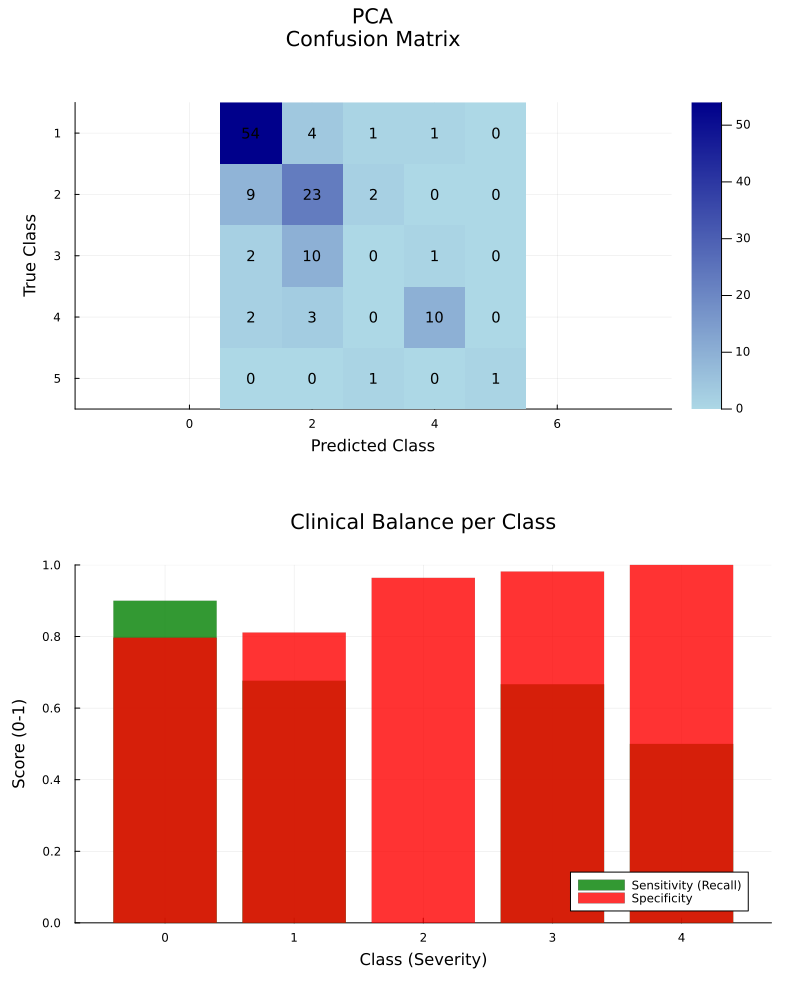

  Standardizing results for Ensemble (ANN_PCA_Topo[8])...
   EXPORT SUCCESS: Resultados_ANN_PCA.jld2
    Métricas Binarias -> Acc: 0.863 | F1: 0.862
Dict{String, Any}("nombre_modelo" => "ANN_PCA_Topo[8]", "metricas" => Dict("f1_score" => 0.8617886178861789, "specificity" => 0.9, "auc_roc" => 0.0, "accuracy" => 0.8629032258064516, "recall" => 0.828125, "precision" => 0.8983050847457628, "training_time_sec" => 0.21000003814697266), "y_pred" => [0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1], "y_test" => [0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,

In [6]:
# Define Topologies to Test (esta son las arquitecturas que utilizaremos)
topologies_to_test = [
    [8], [16], [32], [64],         
    [16, 8], [32, 16], [64, 32], 
    [8,16],[16,32],[32,64],
    [16, 16], [32, 32], [64,64]     
]

approach_name="PCA"

# Aqui se entrena y se obtiene el mejor modelo
winner_tuple = run_topology_search(dataset_pca, approach_name, topologies_to_test)

metrics_object = winner_tuple[9]

#  Aqui se genera las graficos 
println("\n  Generating Clinical Plots for $approach_name...")
generate_clinical_plots(metrics_object, approach_name)

#Aqui se guarda los datos estandarizados
export_standardized_results(winner_tuple, dataset_pca, approach_name)

#Aqui se guardalos resultados
save_approach_results(winner_tuple, dataset_pca, approach_name)

#Save
save_approach_results(winner_tuple, dataset_pca, approach_name)

# approacch ICA



  Starting Topology Search for: ICA

     WINNER SELECTED (Based on Validation): [16, 8]
      Validation Sensitivity: 0.3548
   Running Final Audit on TEST SET...
  FINAL TEST RESULTS:
  Sens: 0.3871 | Acc: 38.71% | F1: 0.386

  Generating Clinical Plots for ICA...


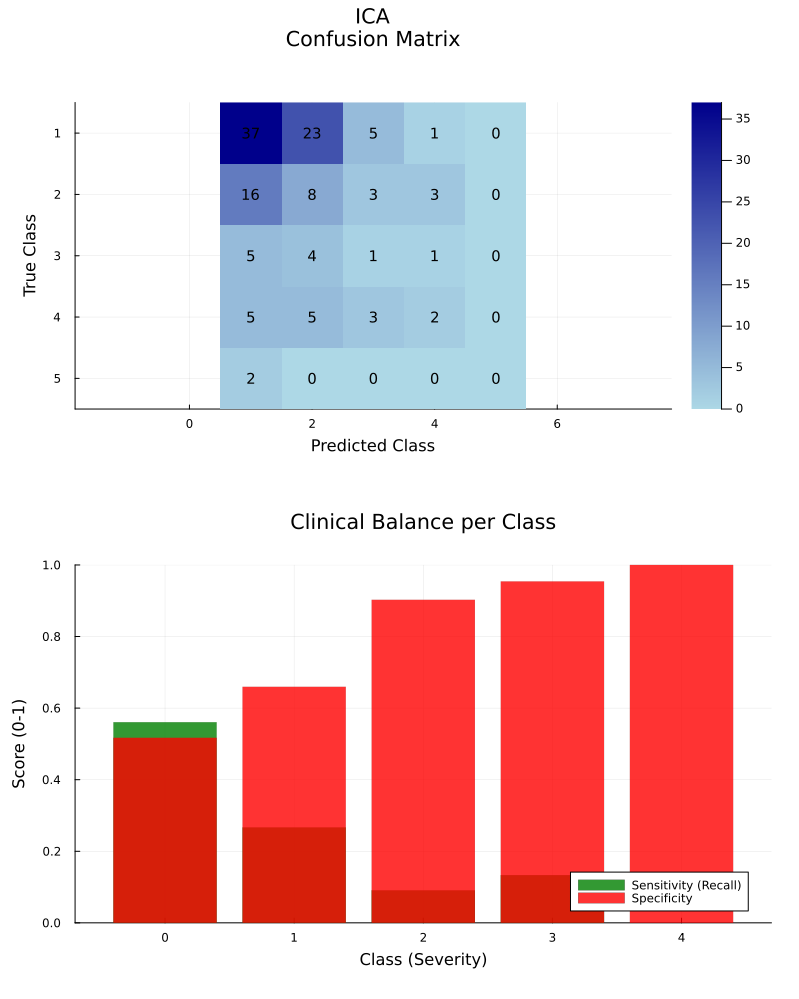

  Standardizing results for Ensemble (ANN_ICA_Topo[16, 8])...
   EXPORT SUCCESS: Resultados_ANN_ICA.jld2
    Métricas Binarias -> Acc: 0.532 | F1: 0.517
Dict{String, Any}("nombre_modelo" => "ANN_ICA_Topo[16, 8]", "metricas" => Dict("f1_score" => 0.5166666666666667, "specificity" => 0.5303030303030303, "auc_roc" => 0.0, "accuracy" => 0.532258064516129, "recall" => 0.5344827586206896, "precision" => 0.5, "training_time_sec" => 0.2219998836517334), "y_pred" => [1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1], "y_test" => [0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0

In [4]:
# Define Topologies to Test (esta son las arquitecturas que utilizaremos)
topologies_to_test = [
    [8], [16], [32], [64],         
    [16, 8], [32, 16], [64, 32], 
    [8,16],[16,32],[32,64],
    [16, 16], [32, 32], [64,64]     
]

approach_name="ICA"

# Aqui se entrena y se obtiene el mejor modelo
winner_tuple = run_topology_search(dataset_ica, approach_name, topologies_to_test)

metrics_object = winner_tuple[9]

#  Aqui se genera las graficos 
println("\n  Generating Clinical Plots for $approach_name...")
generate_clinical_plots(metrics_object, approach_name)

#Aqui se guarda los datos estandarizados
export_standardized_results(winner_tuple, dataset_ica, approach_name)

#Aqui se guardalos resultados
save_approach_results(winner_tuple, dataset_ica, approach_name)

#Save
save_approach_results(winner_tuple, dataset_ica, approach_name)